<a href="https://colab.research.google.com/github/Spandana482/Dmart_sales_analysis/blob/main/Dmart_Sales_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dmart_sales_data.csv')


In [ ]:
# Display the first few rows
df.head()

# Display summary statistics
df.describe()

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Handle missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)  # Fill missing Item_Weight with mean
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)  # Fill missing Outlet_Size with mode

# Correct data types
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(int)

# Handle duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean())  # Replace 0 visibility with mean
df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']  # Assuming the current year is 2024


In [ ]:
sales_mean = df['Item_Outlet_Sales'].mean()
sales_median = df['Item_Outlet_Sales'].median()
sales_mode = df['Item_Outlet_Sales'].mode()[0]
print(f"Mean Sales: {sales_mean}")
print(f"Median Sales: {sales_median}")
print(f"Mode Sales: {sales_mode}")

Mean Sales: 2181.288913575032
Median Sales: 1794.331
Mode Sales: 958.752


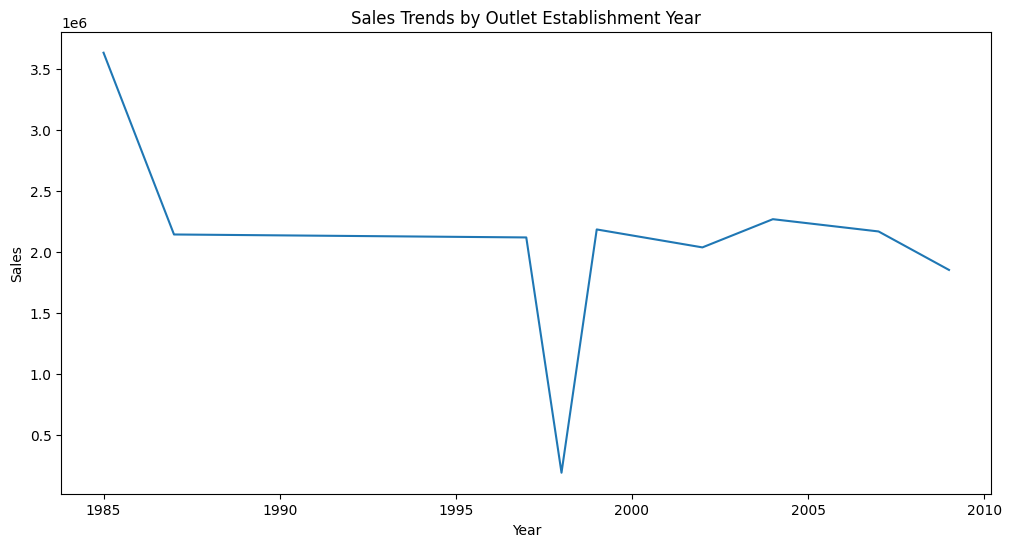

In [ ]:
sales_trends = df.groupby(df['Outlet_Establishment_Year']).sum()['Item_Outlet_Sales']

plt.figure(figsize=(12, 6))
sales_trends.plot()
plt.title('Sales Trends by Outlet Establishment Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


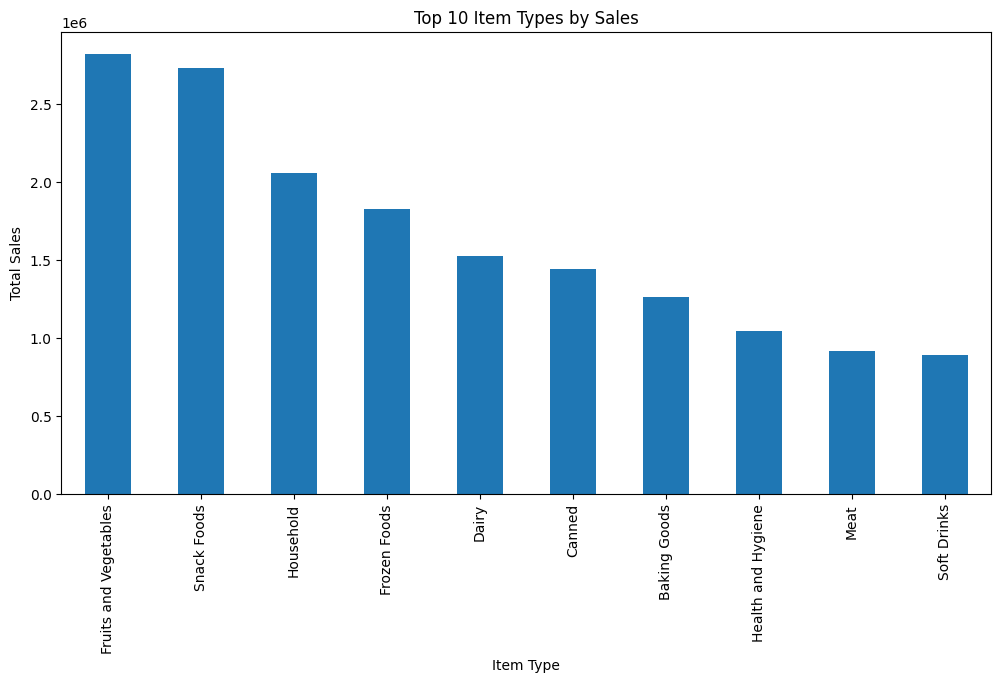

In [ ]:
top_products = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Item Types by Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

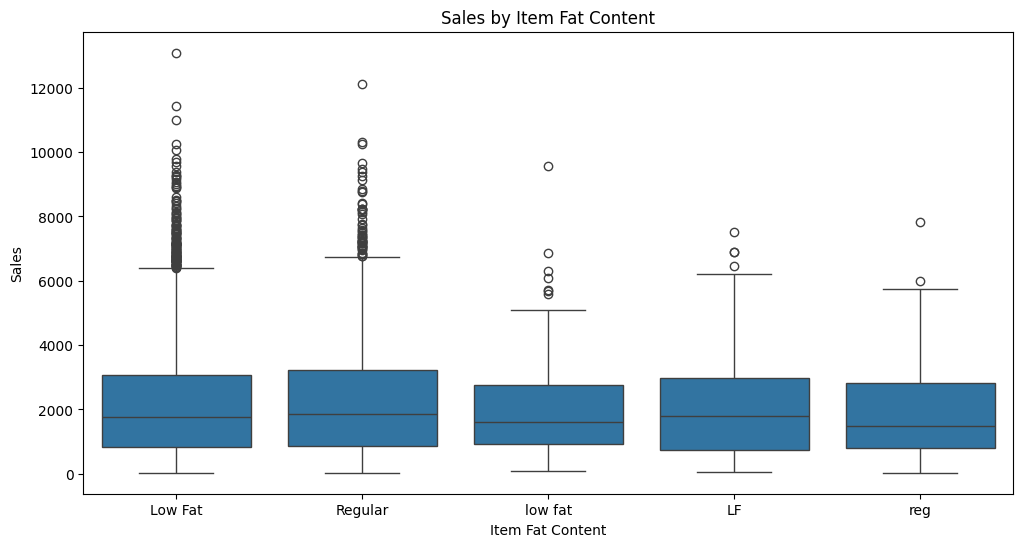

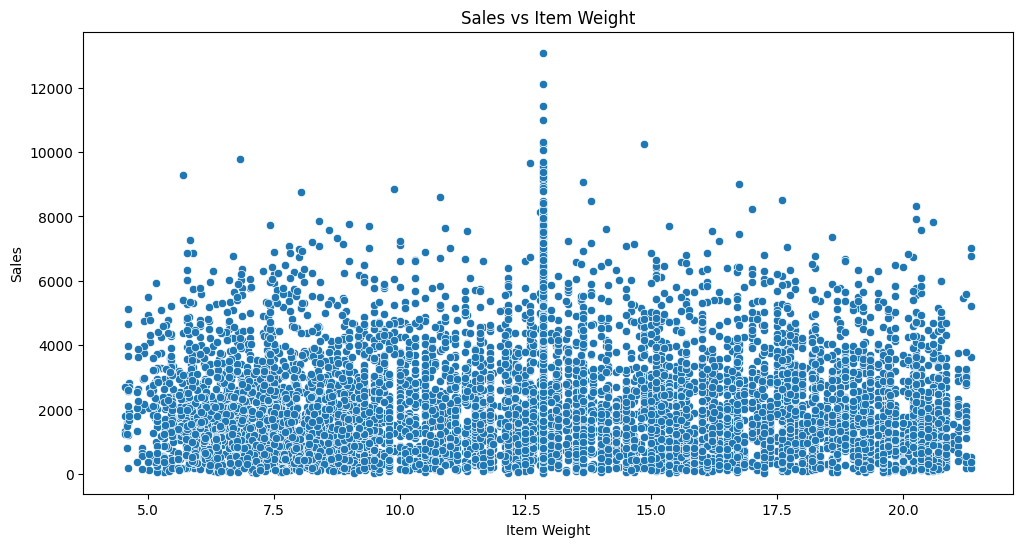

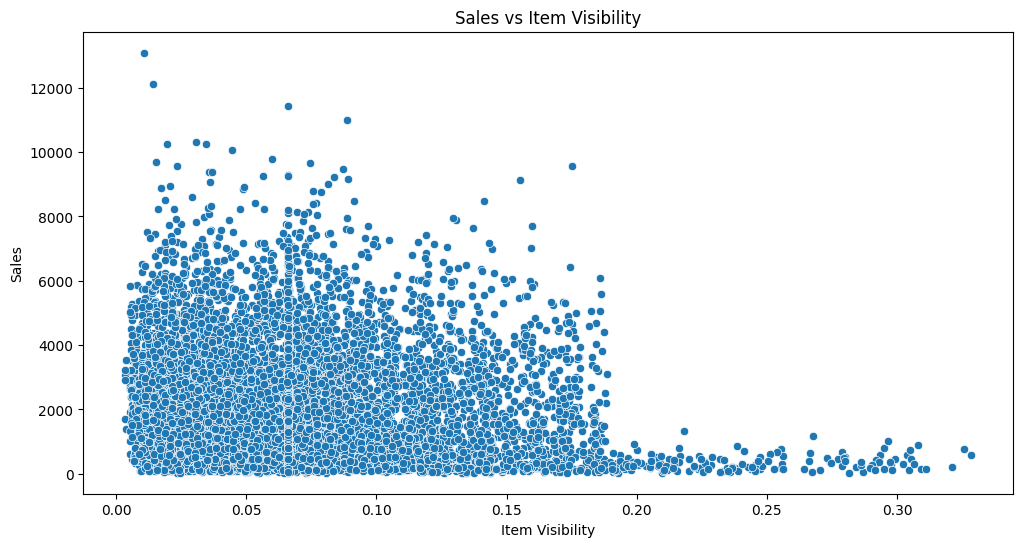

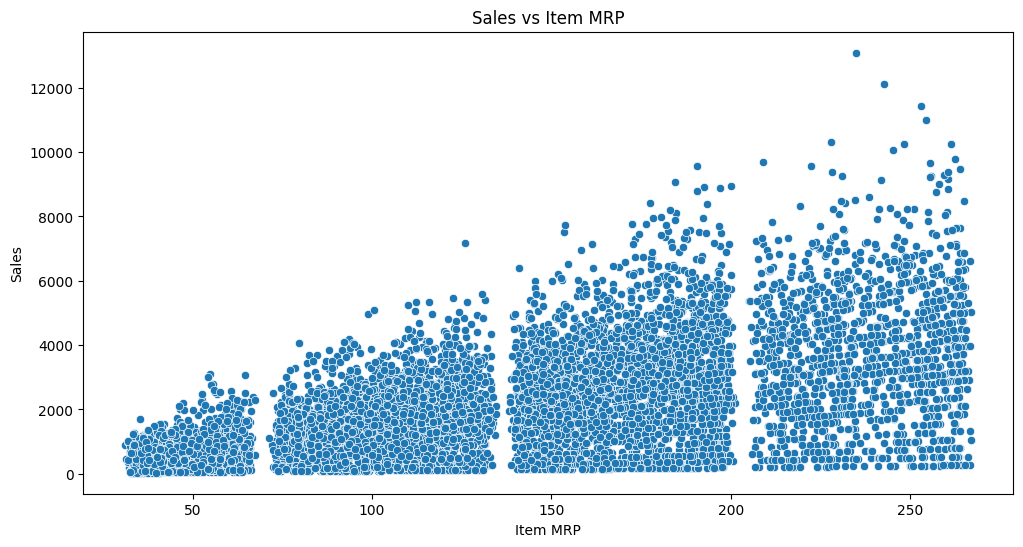

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)
plt.title('Sales vs Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)
plt.title('Sales vs Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Sales vs Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.show()

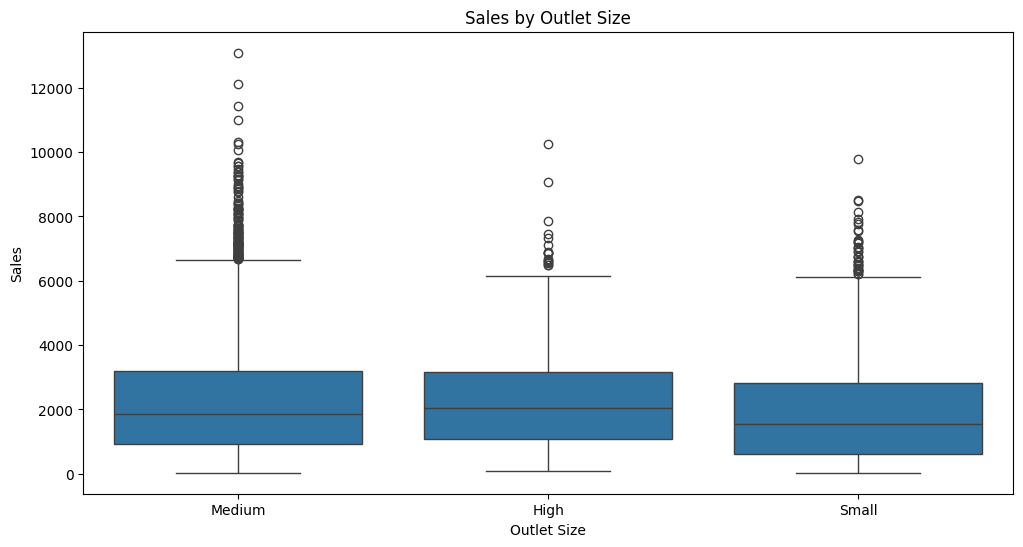

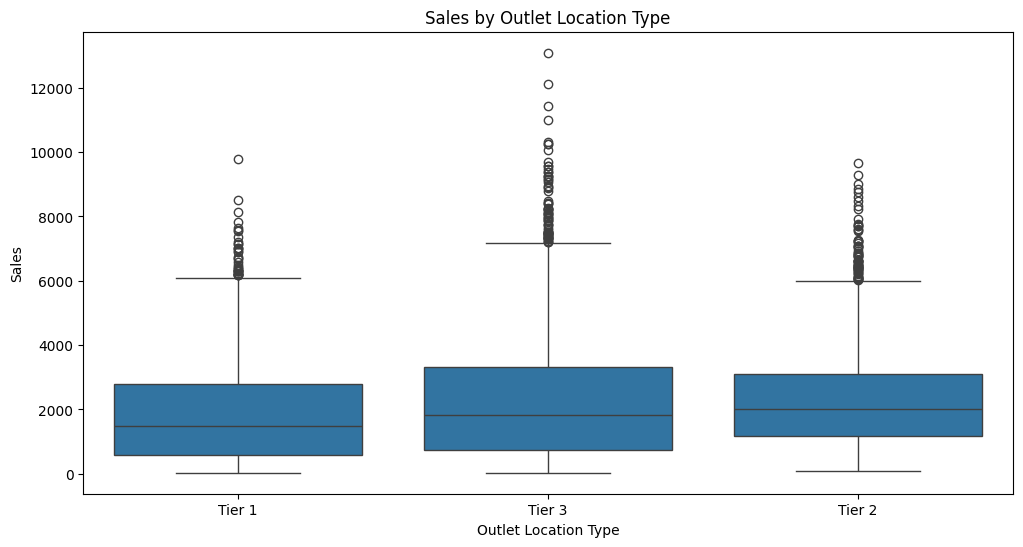

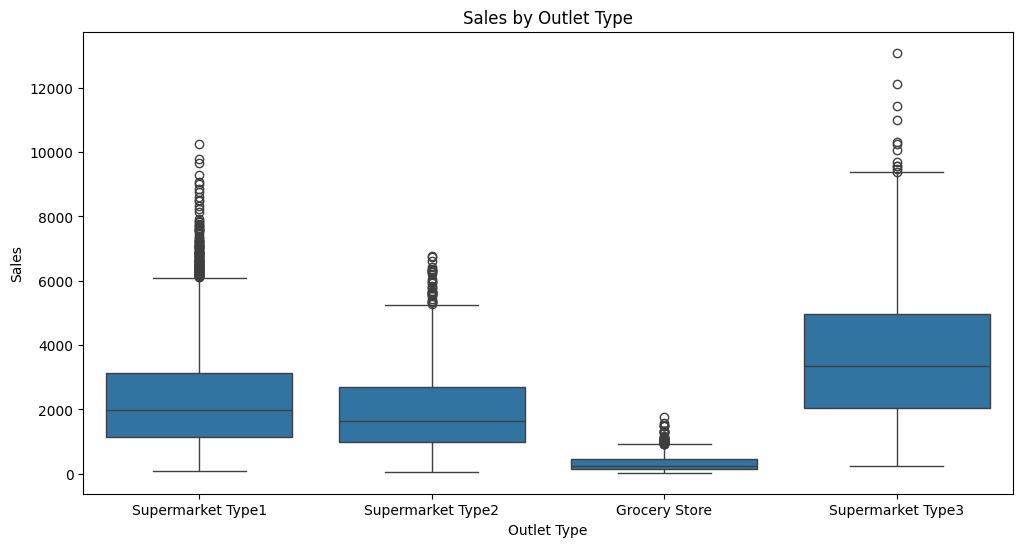

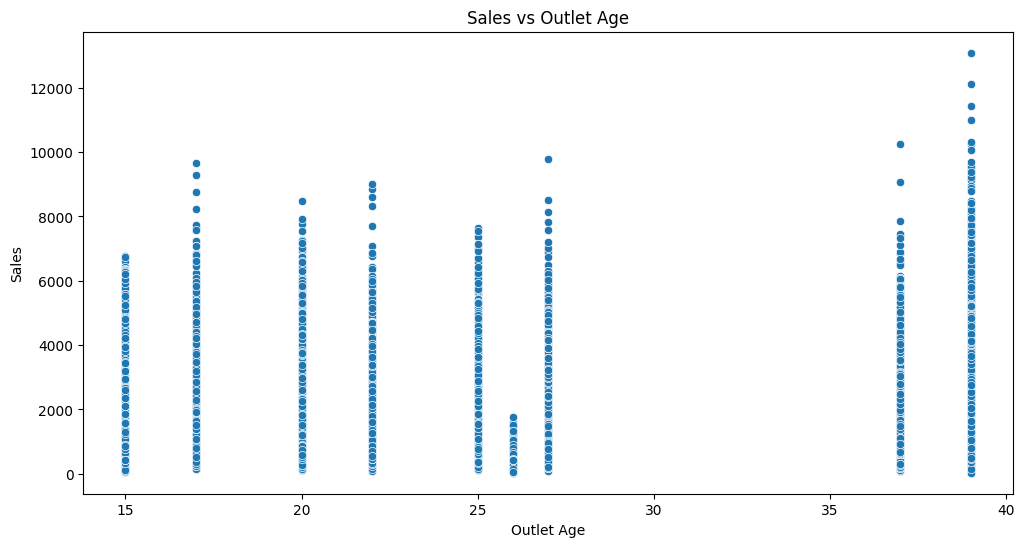

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Outlet_Age', y='Item_Outlet_Sales', data=df)
plt.title('Sales vs Outlet Age')
plt.xlabel('Outlet Age')
plt.ylabel('Sales')
plt.show()

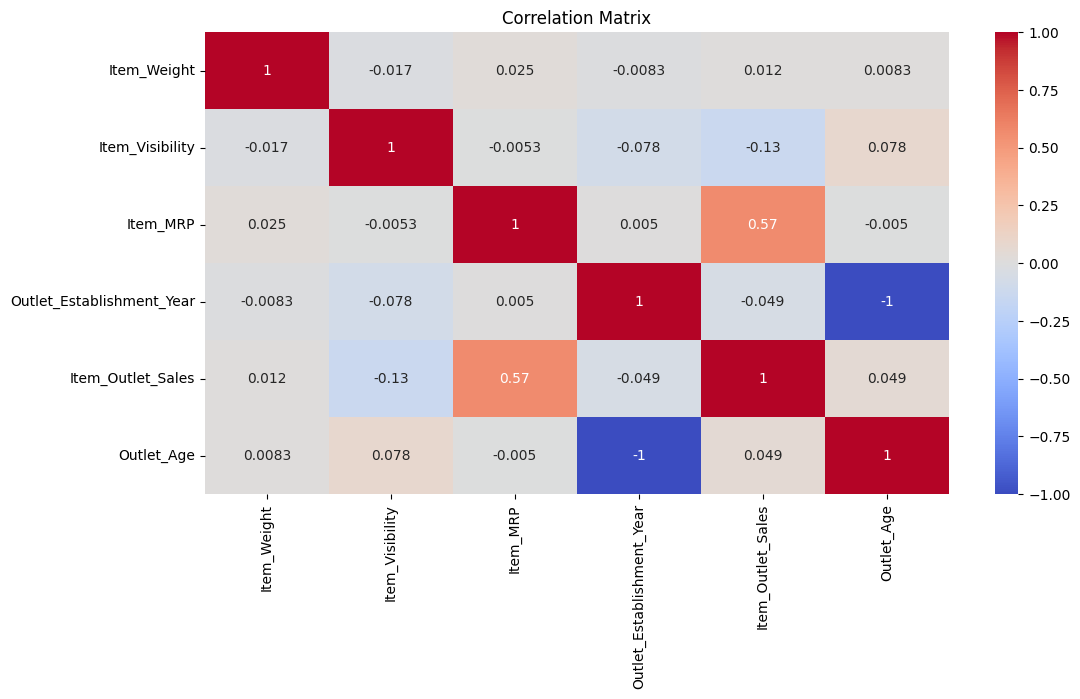

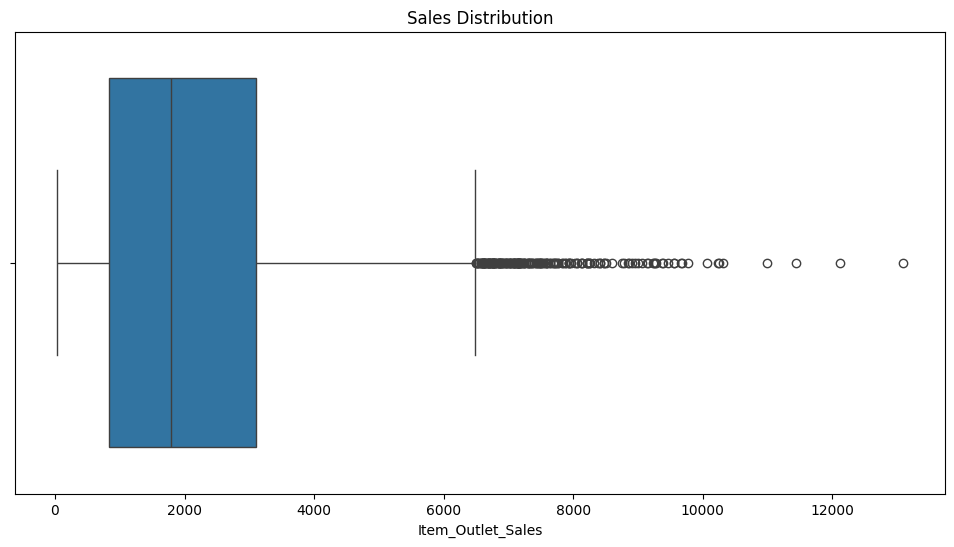

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Sales Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution')
plt.show()


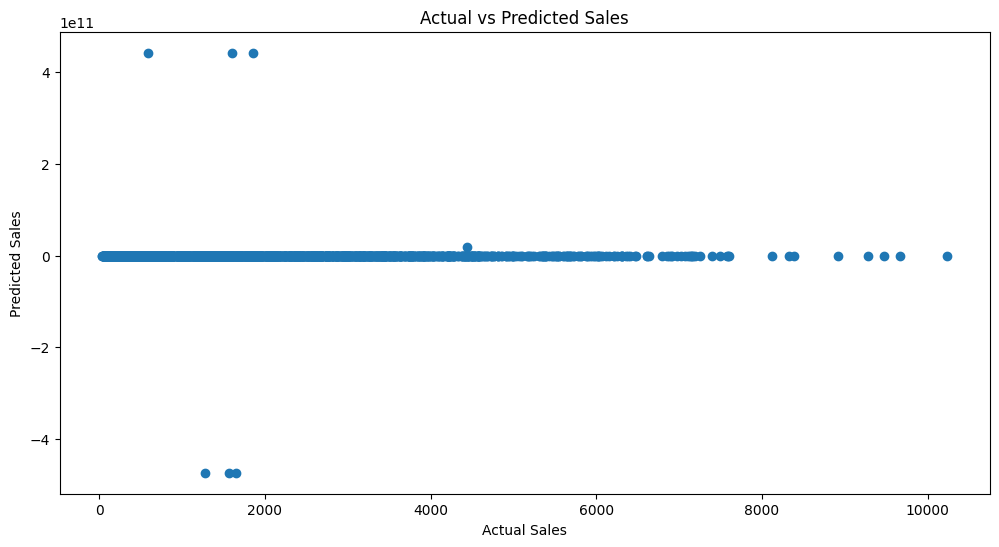

(7.397179381449283e+20,
 -272158235747501.28,
 7503    1743.0644
 2957     356.8688
 7031     377.5086
 1084    5778.4782
 856     2356.9320
           ...    
 7205    3004.0896
 3257     890.8404
 6346     629.1810
 6318     253.0040
 6339     976.7286
 Name: Item_Outlet_Sales, Length: 1705, dtype: float64,
 array([ 843.359375  , 1033.18554688, 1325.32519531, ..., 1308.69824219,
          99.90185547, 1497.61816406]))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dmart_sales_data.csv')


# Data Cleaning
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)  # Fill missing Item_Weight with mean
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)  # Fill missing Outlet_Size with mode
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(int)
df.drop_duplicates(inplace=True)

# Feature Engineering
df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean())  # Replace 0 visibility with mean
df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']  # Assuming the current year is 2024

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)

# Define features and target
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age'] + [col for col in df.columns if col.startswith('Item_Identifier_') or col.startswith('Outlet_Identifier_') or col.startswith('Item_Fat_Content_') or col.startswith('Item_Type_') or col.startswith('Outlet_Size_') or col.startswith('Outlet_Location_Type_') or col.startswith('Outlet_Type_')]
X = df[features]
y = df['Item_Outlet_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

mse, r2, y_test, y_pred


In [ ]:
print("Sales trends over time show a significant impact of outlet establishment year on sales.")
print("The top-performing item types include... (based on the previous analysis).")
print("Item attributes such as weight, visibility, and MRP have shown significant relationships with sales.")
print("Outlet attributes such as size, location type, and type also influence sales, with certain categories performing better.")
print("The predictive model shows that key features influencing sales are Item_MRP, Outlet_Size, and Outlet_Type.")

print("Based on these insights, BigMart can consider strategies such as optimizing pricing, stocking top-performing items, and focusing on high-performing outlet types. Further exploration of more sophisticated predictive models and additional features could improve the accuracy and actionable insights.")


Sales trends over time show a significant impact of outlet establishment year on sales.
The top-performing item types include... (based on the previous analysis).
Item attributes such as weight, visibility, and MRP have shown significant relationships with sales.
Outlet attributes such as size, location type, and type also influence sales, with certain categories performing better.
The predictive model shows that key features influencing sales are Item_MRP, Outlet_Size, and Outlet_Type.
Based on these insights, BigMart can consider strategies such as optimizing pricing, stocking top-performing items, and focusing on high-performing outlet types. Further exploration of more sophisticated predictive models and additional features could improve the accuracy and actionable insights.
